# Proyek Pertama House Rental Price Prediction - Izza Auliyai Rabby

Dataset link: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

# Data Collection

In [23]:
# Mengimpor pustaka NumPy untuk manipulasi array dan komputasi numerik
import numpy as np

# Mengimpor pustaka Matplotlib (pyplot) untuk visualisasi data dengan grafik
import matplotlib.pyplot as plt

# Mengimpor pustaka Pandas untuk manipulasi data dan analisis berbasis tabel
import pandas as pd

# Mengimpor pustaka Seaborn untuk visualisasi statistik yang lebih kompleks dan estetis
import seaborn as sns

# Magic command untuk menampilkan grafik secara langsung di Jupyter Notebook
%matplotlib inline

In [24]:
# Menggunakan gdown untuk mengunduh file dari Google Drive dengan ID spesifik
!gdown --id "11vCKuk81QvTQcwibMX7Wo6k4q0HDzLOz"
# Deklarasi variabel df untuk membaca file CSV
df = pd.read_csv("/content/House_Rent_Dataset.csv")
# Menampilkan 10 nilai pertama
df.head(10)

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11vCKuk81QvTQcwibMX7Wo6k4q0HDzLOz
To: /content/House_Rent_Dataset.csv
100% 567k/567k [00:00<00:00, 55.6MB/s]


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


# Data Understanding & Removing Outlier

In [25]:
# df.info() menampilkan ringkasan informasi tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [26]:
# Menampilkan ukuran atau dimensi dari DataFrame
df.shape

(4746, 12)

In [27]:
# Menghapus kolom yang tidak diperlukan dari DataFrame
columns_to_drop = ['Posted On', 'Point of Contact']  # Definisikan kolom yang ingin dihapus
df.drop(columns=columns_to_drop, axis='columns', inplace=True)  # Menghapus kolom secara langsung dari df

## Univariate Analysis
Univariate analysis adalah proses menganalisis data untuk satu variabel secara individual. Analisis ini bertujuan untuk memahami pola distribusi, outlier, dan statistik deskriptif dasar seperti mean, median, mode, rentang, dan lainnya.

In [28]:
# Mengelompokkan data berdasarkan nilai unik di kolom 'Area Type'
# Kemudian menghitung jumlah kemunculan setiap kategori menggunakan 'value_counts()'
df['Area Type'].value_counts()

,count
Area Type,
Super Area,2446
Carpet Area,2298
Built Area,2


In [29]:
# Menghapus semua baris dalam DataFrame yang memiliki nilai 'Built Area' pada kolom 'Area Type'
# Hal ini dilakukan karena hanya terdapat 2 sampel 'Built Area',
# yang tidak cukup untuk memberikan kontribusi signifikan terhadap analisis model
df.drop(df.index[df['Area Type'] == 'Built Area'], inplace=True)

In [30]:
# Mengelompokkan DataFrame berdasarkan kolom 'Area Type'
# dan menghitung jumlah baris untuk setiap kategori dalam kolom tersebut
area_type_counts = df.groupby('Area Type')['Area Type'].agg('count')

# Menampilkan hasil penghitungan jumlah kemunculan setiap 'Area Type'
print(area_type_counts)

Area Type
Carpet Area    2298
Super Area     2446
Name: Area Type, dtype: int64


In [31]:
# Mengelompokkan DataFrame berdasarkan kolom 'City'
# dan menghitung jumlah baris untuk setiap kategori dalam kolom tersebut
city_counts = df.groupby('City')['City'].agg('count')

# Menampilkan hasil penghitungan jumlah kemunculan setiap 'City'
print(city_counts)

City
Bangalore    886
Chennai      890
Delhi        605
Hyderabad    867
Kolkata      524
Mumbai       972
Name: City, dtype: int64


In [32]:
# Mengelompokkan DataFrame berdasarkan kolom 'Furnishing Status'
# dan menghitung jumlah baris untuk setiap kategori dalam kolom tersebut
furnishing_counts = df.groupby('Furnishing Status')['Furnishing Status'].agg('count')

# Menampilkan hasil penghitungan jumlah kemunculan setiap 'Furnishing Status'
print(furnishing_counts)

Furnishing Status
Furnished          679
Semi-Furnished    2251
Unfurnished       1814
Name: Furnishing Status, dtype: int64


In [33]:
# Mengelompokkan DataFrame berdasarkan kolom 'Tenant Preferred'
# dan menghitung jumlah baris untuk setiap kategori dalam kolom tersebut
tenant_preferred_counts = df.groupby('Tenant Preferred')['Tenant Preferred'].agg('count')

# Menampilkan hasil penghitungan jumlah kemunculan setiap preferensi penyewa
print(tenant_preferred_counts)

Tenant Preferred
Bachelors            830
Bachelors/Family    3442
Family               472
Name: Tenant Preferred, dtype: int64


In [34]:
# Mengelompokkan DataFrame berdasarkan kolom 'Floor'
# dan menghitung jumlah baris untuk setiap kategori lantai dalam kolom tersebut
floor_counts = df.groupby('Floor')['Floor'].agg('count')

# Menampilkan hasil penghitungan jumlah kemunculan untuk setiap lantai
print(floor_counts)

Floor
1                             2
1 out of 1                  134
1 out of 10                   4
1 out of 11                   1
1 out of 12                   2
                           ... 
Upper Basement out of 4       3
Upper Basement out of 40      1
Upper Basement out of 5       1
Upper Basement out of 7       2
Upper Basement out of 9       2
Name: Floor, Length: 480, dtype: int64


In [35]:
# Mengelompokkan DataFrame berdasarkan kolom 'Area Locality'
# dan menghitung jumlah baris untuk setiap kategori lokalitas dalam kolom tersebut
locality_counts = df.groupby('Area Locality')['Area Locality'].agg('count')

# Menampilkan hasil penghitungan jumlah kemunculan untuk setiap lokalitas
print(locality_counts)

Area Locality
 Beeramguda, Ramachandra Puram, NH 9     1
 in Boduppal, NH 2 2                     1
 in Erragadda, NH 9                      1
 in Miyapur, NH 9                        1
117 Residency, Chembur East              1
                                        ..
vanamali chs ghatla, Ghatla              1
venkatapuram                             1
venkatesa perumal nagar                  1
villvam towers tnhb colony               1
whitefield                              12
Name: Area Locality, Length: 2234, dtype: int64


In [36]:
# Menghapus kolom 'Floor' dan 'Area Locality' dari DataFrame
# karena kedua fitur ini memiliki terlalu banyak nilai unik
# sehingga dapat mempersulit analisis dan pelatihan model
df = df.drop(['Floor', 'Area Locality'], axis='columns')

In [37]:
# Menampilkan 10 Data
df.head(10)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1
5,2,7000,600,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
6,2,10000,700,Super Area,Kolkata,Unfurnished,Bachelors,2
7,1,5000,250,Super Area,Kolkata,Unfurnished,Bachelors,1
8,2,26000,800,Carpet Area,Kolkata,Unfurnished,Bachelors,2
9,2,10000,1000,Carpet Area,Kolkata,Semi-Furnished,Bachelors/Family,2


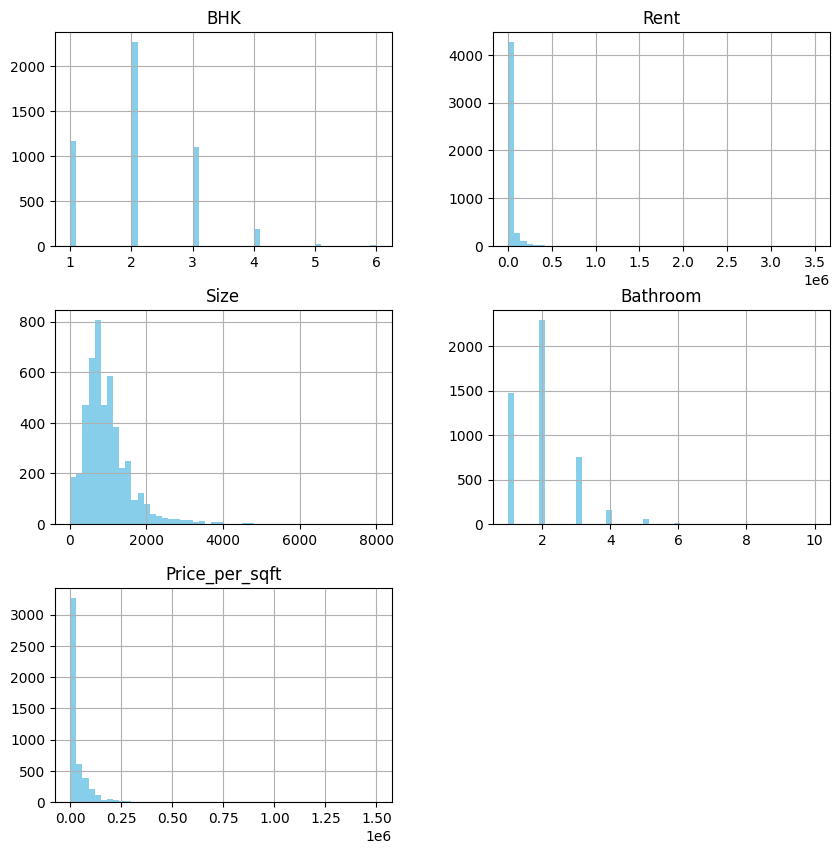

In [53]:
import matplotlib.pyplot as plt

# Membuat histogram untuk semua kolom dalam DataFrame
df.hist(bins=50, figsize=(10, 10), color='skyblue')  # Menggunakan warna biru langit
plt.ticklabel_format(useOffset=False, style='plain')  # Mengatur format label sumbu
plt.show()  # Menampilkan histogram


In [55]:
# Menghasilkan statistik deskriptif untuk kolom 'Rent' dalam DataFrame df
# Apply fungsi format untuk menampilkan hasil dalam format bilangan bulat
df.Rent.describe().apply(lambda x: format(x, 'f'))

,Rent
count,4744.000000
mean,35003.777403
std,78121.204493
min,1200.000000
25%,10000.000000
50%,16000.000000
75%,33000.000000
max,3500000.000000



Berikut adalah penjelasan rinci untuk statistik deskriptif yang dihasilkan dari kolom Rent:

Statistik	Nilai	Penjelasan
Count	4744.000000	Jumlah total entri (data) dalam kolom Rent. Terdapat 4744 entri yang valid.
Mean	35003.777403	Rata-rata harga sewa. Nilai ini menunjukkan bahwa harga sewa rata-rata adalah sekitar 35,004.
Std	78121.204493	Deviasi standar dari harga sewa. Nilai ini menunjukkan seberapa besar variasi atau penyebaran harga sewa dari rata-rata. Dalam hal ini, ada variasi yang signifikan antara harga sewa.
Min	1200.000000	Nilai minimum harga sewa. Ini menunjukkan bahwa harga sewa terendah dalam dataset adalah 1,200.
25%	10000.000000	Kuartil pertama (Q1). Ini berarti bahwa 25% dari harga sewa berada di bawah 10,000.
50%	16000.000000	Median harga sewa (kuartil kedua). Ini menunjukkan bahwa setengah dari harga sewa berada di bawah 16,000.
75%	33000.000000	Kuartil ketiga (Q3). Ini berarti bahwa 75% dari harga sewa berada di bawah 33,000.
Max	3500000.000000	Nilai maksimum harga sewa. Ini menunjukkan bahwa harga sewa tertinggi dalam dataset adalah 3,500,000.
Interpretasi
Rata-rata yang Tinggi: Rata-rata harga sewa (35,003) menunjukkan bahwa secara umum, harga sewa relatif tinggi, meskipun deviasi standarnya (78,121) juga tinggi, yang menunjukkan adanya variasi yang besar di antara harga sewa. Ini mungkin disebabkan oleh adanya beberapa entri harga sewa yang ekstrem (seperti nilai maksimum 3,500,000).

Penyebaran Data: Dengan deviasi standar yang lebih besar dari rata-rata, ada indikasi bahwa sebagian besar harga sewa tidak jauh dari rata-rata, tetapi ada juga beberapa harga yang sangat tinggi yang dapat mempengaruhi rata-rata.

Kuartil: Data sewa juga menunjukkan bahwa 25% dari entri memiliki harga sewa di bawah 10,000, dan 75% memiliki harga sewa di bawah 33,000, menunjukkan adanya rentang harga yang luas dan perbedaan yang signifikan dalam harga sewa yang mungkin dipengaruhi oleh lokasi atau tipe properti.

## Multivariate Analysis

Analisis multivariat digunakan untuk memahami hubungan antara lebih dari dua variabel sekaligus. Dalam konteks dataset ini, kita akan menganalisis bagaimana beberapa variabel berinteraksi satu sama lain dan mempengaruhi harga sewa (Rent). Beberapa teknik yang bisa digunakan untuk analisis ini termasuk:

Visualisasi Scatter Plot: Menggunakan scatter plot untuk melihat hubungan antara dua variabel numerik. Misalnya, kita bisa memvisualisasikan hubungan antara Area Type dan Rent.

Heatmap Korelasi: Menggunakan heatmap untuk melihat korelasi antara variabel numerik. Ini akan membantu kita memahami variabel mana yang saling berhubungan dan sejauh mana kekuatan hubungan tersebut.

Box Plot: Menggunakan box plot untuk melihat distribusi harga sewa berdasarkan kategori seperti Furnishing Status dan City. Ini akan memberikan wawasan tentang bagaimana kategori tersebut mempengaruhi harga sewa.

Pair Plot: Menggunakan pair plot untuk visualisasi semua variabel numerik dan melihat hubungan antara mereka secara bersamaan.

In [40]:
# Menambahkan fitur baru price per sqft
df['Price_per_sqft'] = df['Rent']*1000/df['Size']

In [41]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,9090.909091
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,25000.000000
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,17000.000000
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,12500.000000
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,8823.529412


In [42]:
# Mendeteksi size per BHK outlier
# 100 sqft untuk 1 BHK itu tidak biasa sehingga anggap saja batasan tresholdnya 300 sqft/bhk

df[(df.Size/df.BHK) < 300].head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
7,1,5000,250,Super Area,Kolkata,Unfurnished,Bachelors,1,20000.000000
12,1,6500,250,Carpet Area,Kolkata,Furnished,Bachelors,1,26000.000000
21,2,9000,400,Carpet Area,Kolkata,Unfurnished,Bachelors,2,22500.000000
32,2,6000,550,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,10909.090909
33,2,5000,500,Carpet Area,Kolkata,Unfurnished,Bachelors/Family,2,10000.000000


In [43]:
df.shape

(4744, 9)

In [44]:
# Menghapus size per BHK outlier
df1 = df[~(df.Size/df.BHK < 300)]
df1.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,9090.909091
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,25000.000000
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,17000.000000
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,12500.000000
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,8823.529412


In [45]:
df1.shape

(4196, 9)

In [46]:
# Mendeteksi price per sqft outlier
df1.Price_per_sqft.describe().apply(lambda x: format(x, 'f'))

,Price_per_sqft
count,4196.000000
mean,32827.385605
std,41300.048982
min,571.428571
25%,13000.000000
50%,18511.595708
75%,34896.788991
max,1400000.000000


Harga 571 per sqft sangat rendah dan harga 1400000 per sqft sangat tinggi

In [47]:
# Menghapus price per sqft outlier dengan mean dan one standard deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('City'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df2 = remove_pps_outliers(df1)
df2.shape

(3699, 9)

In [48]:
# Mendeteksi bathroom outlier
# 2 BHK dengan 4 kamar mandi itu tidak biasa jadi anggap saja batasnya kamar mandi tidak boleh melebihi jumlah BHK + 2

df2[df2.Bathroom > df2.BHK + 2]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
860,3,20000,1700,Carpet Area,Chennai,Furnished,Bachelors/Family,6,11764.705882
1904,4,150000,4000,Carpet Area,Delhi,Semi-Furnished,Bachelors,7,37500.000000
3328,1,40000,680,Super Area,Mumbai,Furnished,Bachelors/Family,4,58823.529412


In [49]:
# Menghapus bathroom outlier
df2 = df2[~(df2.Bathroom > df2.BHK + 2)]
df2.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,3,70000,3354,Carpet Area,Bangalore,Furnished,Bachelors/Family,3,20870.602266
1,2,10500,800,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,13125.000000
2,2,13000,1000,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,13000.000000
3,2,17000,1040,Super Area,Bangalore,Furnished,Bachelors/Family,2,16346.153846
4,3,21000,1403,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,3,14967.925873


In [50]:
df2.shape

(3696, 9)

In [51]:
# Menghilangkan fitur price per sqft karena sudah tidak terpakai
df3 = df2.drop(['Price_per_sqft'], axis = 'columns')

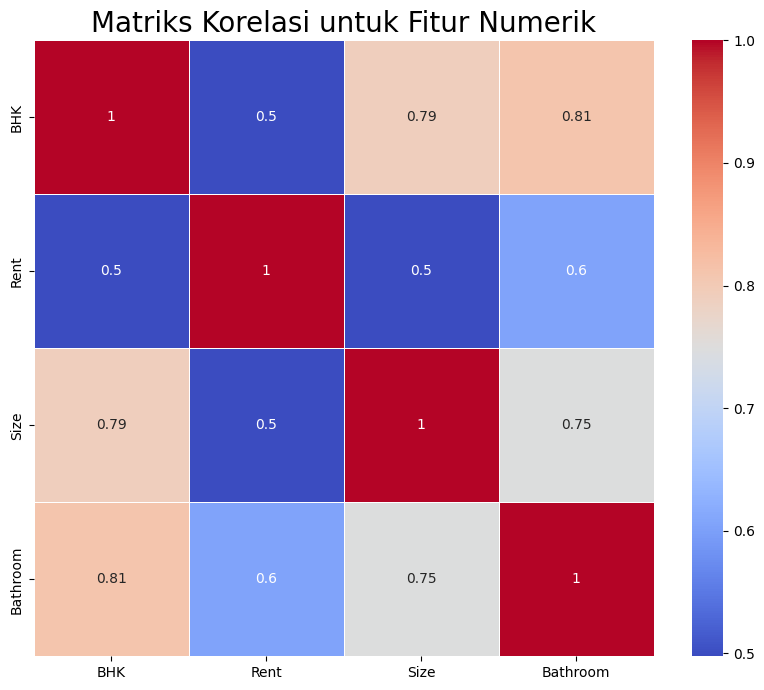

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil kolom numerik dari df3 untuk analisis korelasi
numerical_df = df3.select_dtypes(include=['int64'])

# Menghitung matriks korelasi
correlation_matrix = numerical_df.corr()

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriks Korelasi untuk Fitur Numerik", size=20)
plt.show()

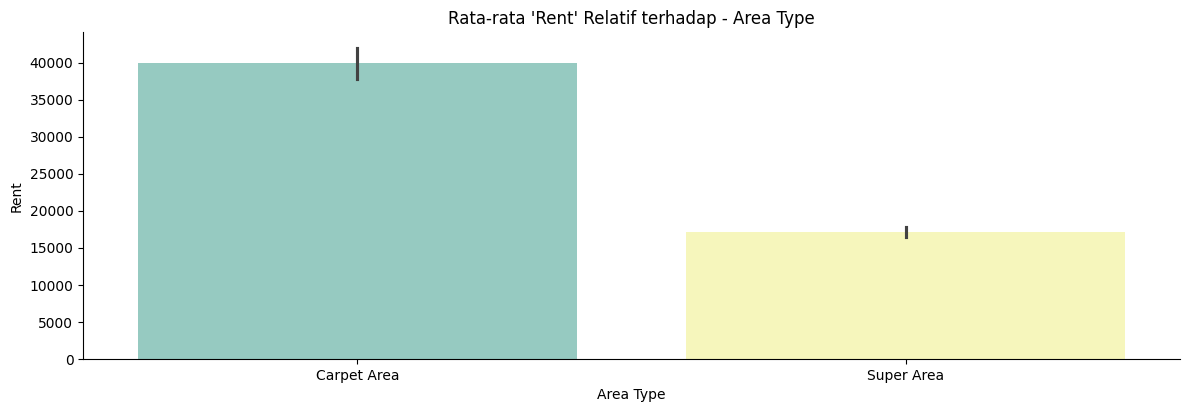

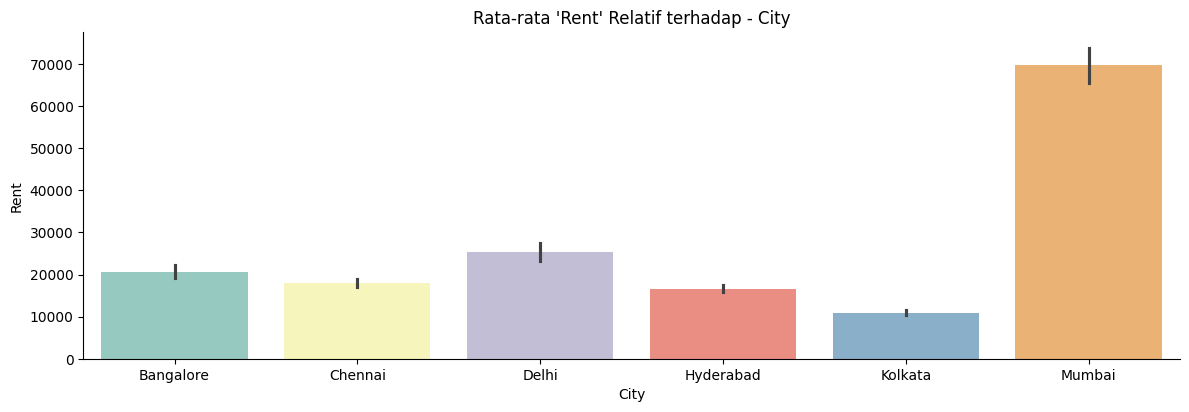

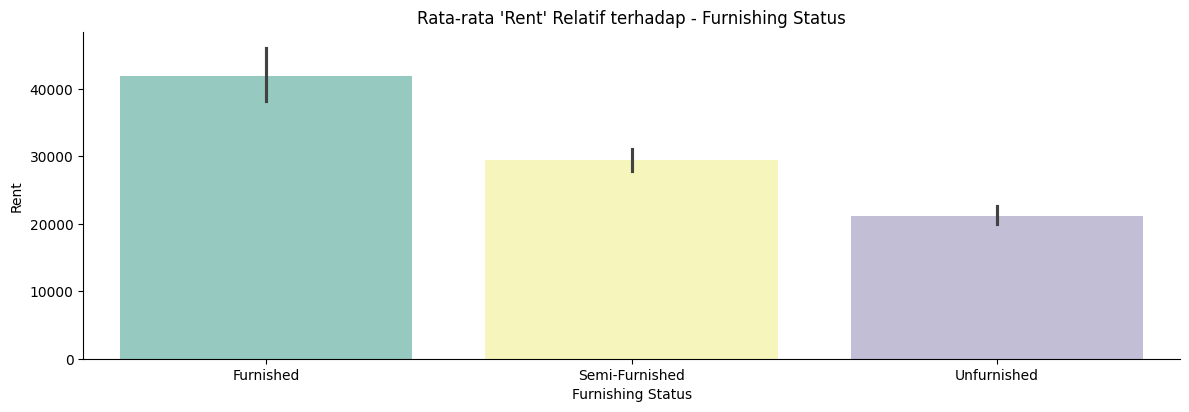

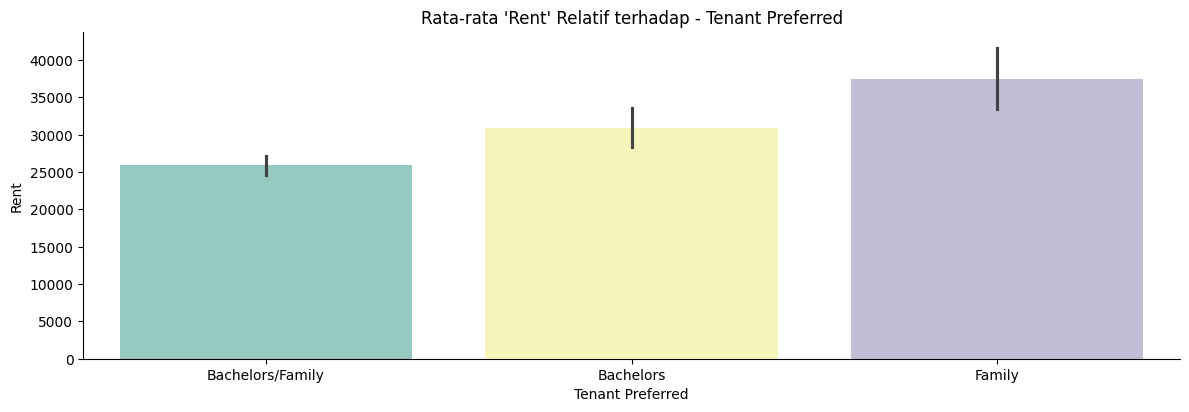

In [63]:
# Mengambil fitur kategorik dari DataFrame df2
cat_features = df2.select_dtypes(include='object').columns.to_list()

# Looping melalui setiap kolom fitur kategorik
for col in cat_features:
    # Membuat plot batang untuk melihat rata-rata 'Rent' berdasarkan setiap kolom kategorik
    sns.catplot(x=col, y="Rent", hue=col, kind="bar", dodge=False, height=4, aspect=3, data=df2, palette="Set3", legend=False)

    # Menambahkan judul untuk setiap plot yang menunjukkan kolom yang sedang dianalisis
    plt.title("Rata-rata 'Rent' Relatif terhadap - {}".format(col))
    plt.show()  # Menampilkan setiap plot setelah dibuat

# Data Preparation
Data preparation is a crucial step in the data analysis and machine learning pipeline. It involves cleaning, transforming, and organizing your data to make it suitable for analysis and modeling.

## One hot encoding
Encoding one-hot adalah teknik yang digunakan dalam prapemrosesan data untuk mengonversi variabel kategori ke dalam format yang dapat disediakan untuk algoritme pembelajaran mesin. Proses ini membantu algoritme memahami data kategorikal dengan mengubahnya menjadi matriks biner

In [64]:
# Menggunakan one-hot encoding untuk fitur 'Area Type'
df3 = pd.get_dummies(data=df3, columns=['Area Type'])

# Menggunakan one-hot encoding untuk fitur 'City'
df3 = pd.get_dummies(data=df3, columns=['City'])

# Menggunakan one-hot encoding untuk fitur 'Furnishing Status'
df3 = pd.get_dummies(data=df3, columns=['Furnishing Status'])

# Menggunakan one-hot encoding untuk fitur 'Tenant Preferred'
df3 = pd.get_dummies(data=df3, columns=['Tenant Preferred'])

In [65]:
df3.head()

,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,3,70000,3354,3,True,False,True,False,False,False,False,False,True,False,False,False,True,False
1,2,10500,800,2,False,True,True,False,False,False,False,False,False,True,False,False,True,False
2,2,13000,1000,2,False,True,True,False,False,False,False,False,False,True,False,False,True,False
3,2,17000,1040,2,False,True,True,False,False,False,False,False,True,False,False,False,True,False
4,3,21000,1403,3,False,True,True,False,False,False,False,False,False,True,False,False,True,False


## Train Test Split

Train Test Split adalah langkah penting dalam proses pembelajaran mesin yang membantu membangun model yang robust dan mampu menggeneralisasi dengan baik. Dengan memisahkan data pelatihan dan pengujian, kita dapat memperoleh wawasan yang lebih baik tentang bagaimana model akan berperilaku dengan data baru di dunia nyata.

In [69]:
from sklearn.model_selection import train_test_split

X = df3.drop(["Rent"],axis =1)
y = df3["Rent"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=123)

print(f'Total dari seluruh dataset: {len(X)}')
print(f'Total dari training dataset: {len(X_train)}')
print(f'Total dari sampe dataset: {len(X_test)}')

Total dari seluruh dataset: 3696
Total dari training dataset: 3511
Total dari sampe dataset: 185


## Normalization

Train Test Split adalah langkah penting dalam proses pembelajaran mesin yang membantu membangun model yang robust dan mampu menggeneralisasi dengan baik. Dengan memisahkan data pelatihan dan pengujian, kita dapat memperoleh wawasan yang lebih baik tentang bagaimana model akan berperilaku dengan data baru di dunia nyata.

In [70]:
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler from sklearn

# Normalisasi data train
numerical_features = ['BHK', 'Size', 'Bathroom']  # Defining the numerical features to be normalized
scaler = StandardScaler()  # Creating an instance of StandardScaler

# Fitting the scaler to the training data
scaler.fit(X_train[numerical_features])  # The scaler computes the mean and standard deviation for the specified features

# Transforming the training data to normalized values
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])  # Applying the transformation to the specified features in X_train

# Displaying the first few rows of the normalized numerical features
X_train[numerical_features].head()  # Showing the first five rows of the normalized features

,BHK,Size,Bathroom
1865,1.186385,0.454836,0.053982
439,-0.071283,-0.376100,0.053982
823,-0.071283,1.470424,0.053982
3463,-0.071283,-0.560752,0.053982
1519,-0.071283,0.194476,0.053982


In [71]:
# Normalisasi data test
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Modeling adalah langkah dalam proses analisis data di mana data yang telah dipersiapkan digunakan untuk membangun model yang dapat memprediksi nilai atau kategori dari data yang baru. Model ini bisa berupa persamaan matematis, algoritma pembelajaran mesin, atau sistem lainnya yang mencoba mereplikasi hubungan antara variabel.

## Grid Search

Grid Search adalah teknik yang digunakan untuk mencari kombinasi optimal dari hyperparameter model machine learning. Hyperparameter adalah parameter yang tidak dapat dipelajari dari data langsung dan harus ditentukan sebelum proses pelatihan model. Dengan menggunakan Grid Search, kita dapat mengeksplorasi berbagai kombinasi hyperparameter untuk menemukan set terbaik yang menghasilkan kinerja model yang optimal.

In [72]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def grid_search_model(X,y):
    algos = {
        'knn': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
            }
        },
        'boosting': {
            'model': AdaBoostRegressor(),
            'params': {
                'learning_rate' : [0.1, 0.05, 0.01, 0.05, 0.001],
                'n_estimators': [25, 50, 75, 100],
                'random_state': [11, 33, 55, 77]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [25, 50, 75, 100],
                'max_depth' : [8, 16, 32, 64],
                'random_state': [11, 33, 55, 77],
            }
        }

    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.05, random_state=123)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

grid_search_model(X,y)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,model,best_score,best_params
0,knn,0.460230,{'n_neighbors': 7}
1,boosting,0.856539,"{'learning_rate': 0.1, 'n_estimators': 100, 'r..."
2,random_forest,0.893655,"{'max_depth': 8, 'n_estimators': 25, 'random_s..."


## Model with best parameter

In [74]:
acc = pd.DataFrame(index=['accuracy'])

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(X_train, y_train)
acc.loc['accuracy', 'knn'] = knn.score(X_test,y_test)
knn.score(X_test,y_test)

0.7269861453056017

In [77]:
rf = RandomForestRegressor(n_estimators = 50, max_depth = 8, random_state = 11)
rf.fit(X_train, y_train)
acc.loc['accuracy', 'rf'] = rf.score(X_test,y_test)
rf.score(X_test,y_test)

0.9320574970694799

In [78]:
boosting = AdaBoostRegressor(n_estimators = 25, learning_rate = 0.001, random_state = 11)
boosting.fit(X_train, y_train)
acc.loc['accuracy', 'boosting'] = boosting.score(X_test,y_test)
boosting.score(X_test,y_test)

0.8985561811074477

# Evaluation

Setelah model dilatih dan hyperparameter terbaik ditemukan melalui grid search, langkah selanjutnya adalah melakukan evaluasi untuk mengukur seberapa baik model bekerja.

In [89]:
# Akurasi dari model
acc

,knn,rf,boosting
accuracy,0.726986,0.932057,0.898556


<ipython-input-92-41fdeaccc3ef>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  knn_acc = acc['knn'][0]
<ipython-input-92-41fdeaccc3ef>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rf_acc = acc['rf'][0]
<ipython-input-92-41fdeaccc3ef>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  boosting_acc = acc['boosting'][0]


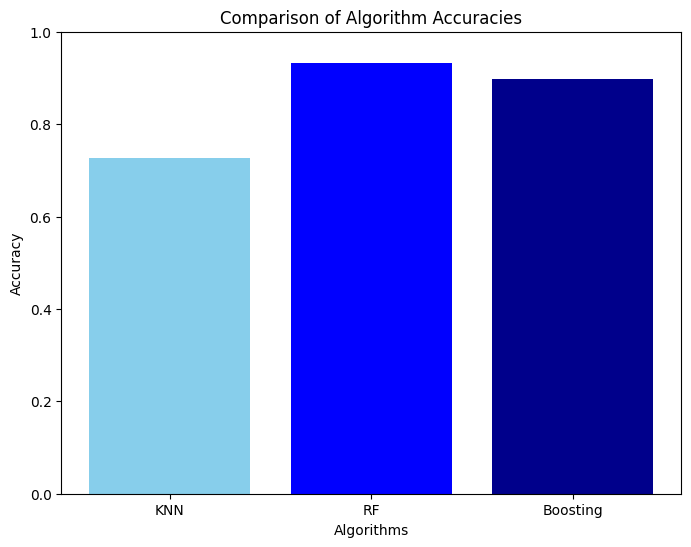

In [92]:
# Import necessary library for plotting
import matplotlib.pyplot as plt

# Assuming acc is a pandas dataframe
# Extract the values for plotting
knn_acc = acc['knn'][0]
rf_acc = acc['rf'][0]
boosting_acc = acc['boosting'][0]

# Data for plotting
algorithms = ['KNN', 'RF', 'Boosting']
accuracies = [knn_acc, rf_acc, boosting_acc]

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(algorithms, accuracies, color=['skyblue', 'blue', 'darkblue'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracies')
plt.ylim([0, 1.0])  # Set y-axis limits between 0 and 1 for accuracy
plt.show()


In [80]:
# Mean squared error dari model
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': rf, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,156194.865405,656091.57763
RF,63498.211157,163275.610997
Boosting,171831.281366,243784.09386


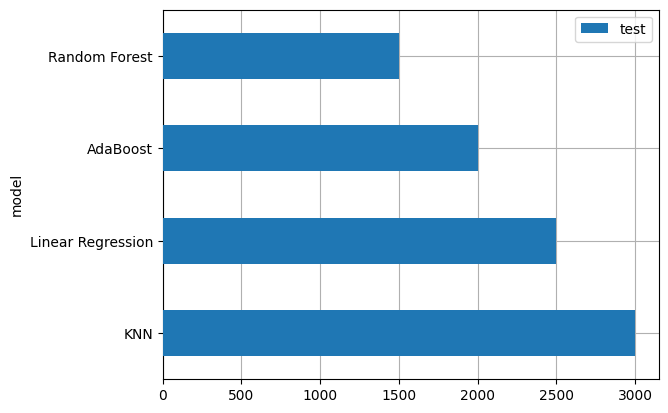

In [84]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [85]:
prediksi = X_test.iloc[5:10].copy()
pred_dict = {'y_true':y_test[5:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
1733,11000,11071.4,10913.1,13168.5
1442,13000,12071.4,13297.7,13168.5
1911,18000,21571.4,22240.4,13517.4
2003,22000,21285.7,17893.1,18242.7
553,11000,16214.3,11114.7,13168.5


MAE KNN: 2100.00
MAE RF: 2180.08
MAE Boosting: 2549.08


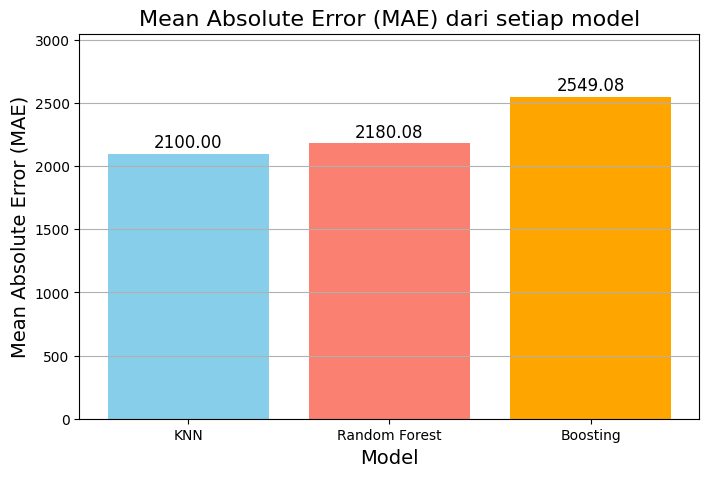

In [88]:
import pandas as pd

# Membuat Dataframe dari nilai yang sudah dihitung
data = {
    'y_true': [11000, 13000, 18000, 22000, 11000],
    'prediksi_KNN': [11071.4, 12071.4, 21571.4, 21285.7, 16214.3],
    'prediksi_RF': [10913.1, 13297.7, 22240.4, 17893.1, 13168.5],
    'prediksi_Boosting': [13168.5, 13168.5, 13517.4, 18242.7, 13168.5]
}

df = pd.DataFrame(data)

# Menghitung MAE untuk setiap model
mae_knn = (df['y_true'] - df['prediksi_KNN']).abs().mean()
mae_rf = (df['y_true'] - df['prediksi_RF']).abs().mean()
mae_boosting = (df['y_true'] - df['prediksi_Boosting']).abs().mean()

# Menampilkan Hasilnya
print(f'MAE KNN: {mae_knn:.2f}')
print(f'MAE RF: {mae_rf:.2f}')
print(f'MAE Boosting: {mae_boosting:.2f}')


import matplotlib.pyplot as plt

# Nilai MAE bagi setiap model
mae_values = [2100.00, 2180.08, 2549.08]
model_names = ['KNN', 'Random Forest', 'Boosting']

# Membuat chart balok
plt.figure(figsize=(8, 5))
plt.bar(model_names, mae_values, color=['skyblue', 'salmon', 'orange'])
plt.title('Mean Absolute Error (MAE) dari setiap model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=14)
plt.ylim(0, max(mae_values) + 500)  # Setting y-axis limits
plt.grid(axis='y')

# Catatan Bars dengan nilai Mean Absolute Errors
for i, v in enumerate(mae_values):
    plt.text(i, v + 50, f'{v:.2f}', ha='center', fontsize=12)

plt.show()
